In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv("/data.csv")

In [ ]:
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:
#checking the number of rows and columns:
df.shape


(569, 32)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#the properties of the data-summary statistics:
df.info


<bound method DataFrame.info of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...     

In [ ]:
#checking null values:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Drop missing values
df = df.dropna(axis=1)

In [ ]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='diagnosis'>

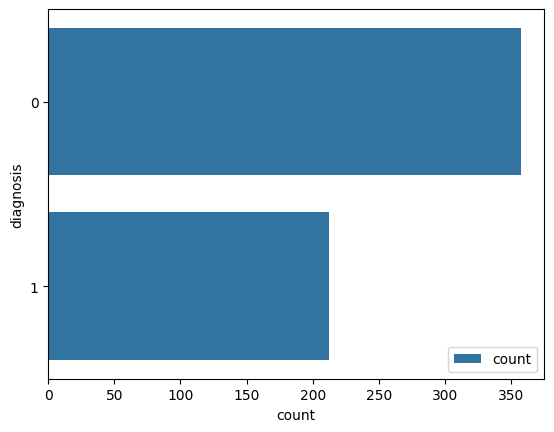

In [ ]:
sns.countplot(y=df['diagnosis'], label='count')


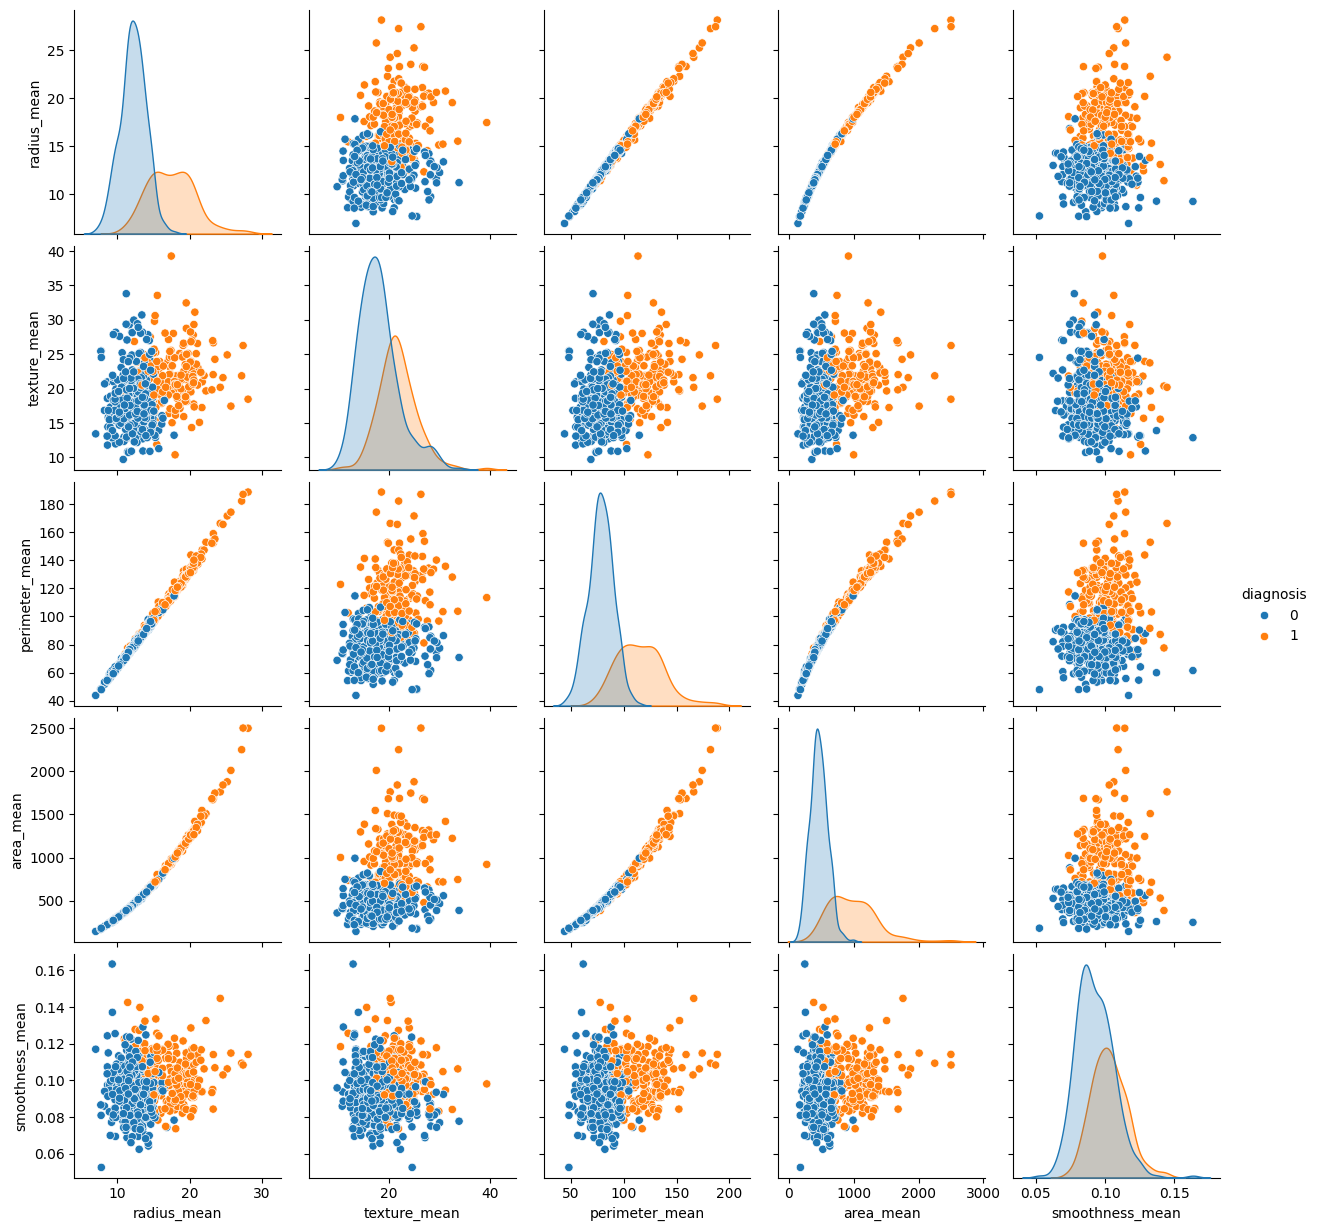

In [ ]:
sns.pairplot(df.iloc[:,1:7],hue='diagnosis')

<Axes: >

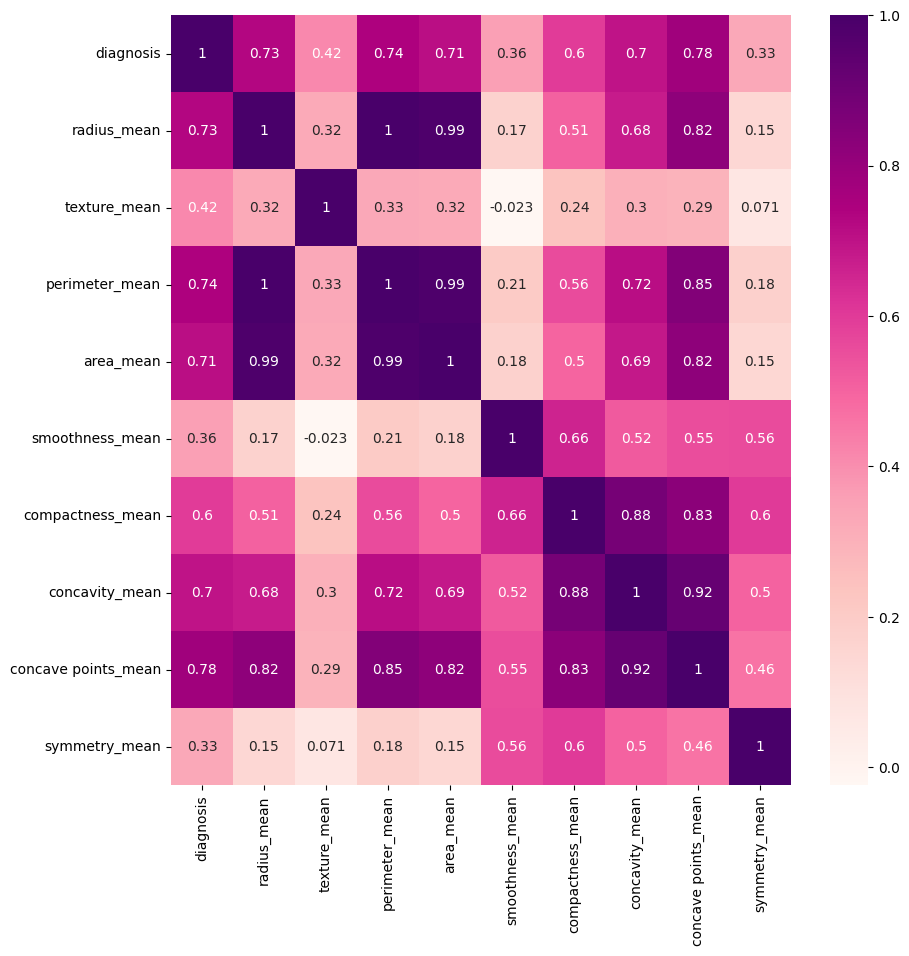

In [ ]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:11].corr(),cmap='RdPu',annot =True)

In [ ]:
# Encode target variable
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [ ]:
# Split dataset
X = df.iloc[:, 2:31].values
Y = df.iloc[:, 1].values.astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

In [ ]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
!pip install --upgrade scikit-learn xgboost


In [ ]:
def train_models(X_train, Y_train):
    models = {}

    log = LogisticRegression()
    params_log = {'C': [0.1, 1, 10]}
    models['Logistic Regression'] = GridSearchCV(log, params_log, cv=5, n_jobs=-1).fit(X_train, Y_train)

    tree = DecisionTreeClassifier()
    params_tree = {'max_depth': [3, 5, 10], 'criterion': ['gini', 'entropy']}
    models['Decision Tree'] = GridSearchCV(tree, params_tree, cv=5, n_jobs=-1).fit(X_train, Y_train)

    forest = RandomForestClassifier()
    params_forest = {'n_estimators': [50, 100, 200]}
    models['Random Forest'] = GridSearchCV(forest, params_forest, cv=5, n_jobs=-1).fit(X_train, Y_train)


    return models

In [ ]:
# Train models
models = train_models(X_train, Y_train)

In [ ]:
# Evaluate models
for name, model in models.items():
    y_pred = model.best_estimator_.predict(X_test)
    print(f'\n{name} Model Performance:')
    print(classification_report(Y_test, y_pred))
    print("Accuracy:", accuracy_score(Y_test, y_pred))


Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158

Decision Tree Model Performance:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193

Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy     

In [ ]:
    # Print actual vs predicted values
    actual_vs_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
    print("\nActual vs Predicted for", name)
    print(actual_vs_pred.head())



Actual vs Predicted for Random Forest
   Actual  Predicted
0       0          0
1       1          1
2       0          0
3       1          1
4       0          0


In [ ]:
# Ensemble model
voting_clf = VotingClassifier(estimators=[
    ('log', models['Logistic Regression'].best_estimator_),
    ('tree', models['Decision Tree'].best_estimator_),
    ('forest', models['Random Forest'].best_estimator_),

], voting='hard')


In [ ]:
voting_clf.fit(X_train, Y_train)
y_pred_voting = voting_clf.predict(X_test)
print('\nEnsemble Model Performance:')
print(classification_report(Y_test, y_pred_voting))
print("Accuracy:", accuracy_score(Y_test, y_pred_voting))


Ensemble Model Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Accuracy: 0.9912280701754386


In [ ]:
# Print actual vs predicted for Ensemble model
actual_vs_pred_voting = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_voting})
print("\nActual vs Predicted for Ensemble Model")
print(actual_vs_pred_voting.head())


Actual vs Predicted for Ensemble Model
   Actual  Predicted
0       0          0
1       1          1
2       0          0
3       1          1
4       0          0
